라이브러리 불러오기

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


#### 데이터 불러오기

In [125]:
raw_data = pd.read_csv("C:/Users/Owner/Desktop/DAproject/diversified_ecommerce_dataset.csv")

In [126]:
data = pd.DataFrame(raw_data)
## 원본 데이터를 유지하기 위해 원본데이터를 복사하여 분석에 사용할 데이터 data_copy 변수에에 지정한다. 
data_copy = data.copy()

#### 데이터 탐색

In [127]:
data.shape

(1000000, 16)

In [128]:
data_copy.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,P6879,Jacket,Apparel,53.85,5,15,150,S535,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,P5132,Camera,Electronics,761.26,10,15,224,S583,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,P2941,Sneakers,Footwear,1756.76,5,8,468,S118,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,P8545,Cookbooks,Books,295.24,10,15,25,S104,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,P4594,Camera,Electronics,832.00,10,12,340,S331,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56


In [129]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Product ID          1000000 non-null  object 
 1   Product Name        1000000 non-null  object 
 2   Category            1000000 non-null  object 
 3   Price               1000000 non-null  float64
 4   Discount            1000000 non-null  int64  
 5   Tax Rate            1000000 non-null  int64  
 6   Stock Level         1000000 non-null  int64  
 7   Supplier ID         1000000 non-null  object 
 8   Customer Age Group  1000000 non-null  object 
 9   Customer Location   1000000 non-null  object 
 10  Customer Gender     1000000 non-null  object 
 11  Shipping Cost       1000000 non-null  float64
 12  Shipping Method     1000000 non-null  object 
 13  Return Rate         1000000 non-null  float64
 14  Seasonality         1000000 non-null  object 
 15  Popularity Index

In [130]:
data_copy.describe()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1005.120742,12.516955,10.002052,250.028536,24.985224,10.492896,49.970211
std,574.451223,8.539929,3.406026,144.676275,14.431730,5.484849,29.164875
min,10.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,507.860000,5.000000,8.000000,125.000000,12.490000,5.740000,25.000000
50%,1005.430000,15.000000,10.000000,250.000000,24.970000,10.480000,50.000000
75%,1502.310000,20.000000,12.000000,375.000000,37.470000,15.250000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [131]:
### 결측치 확인
data_copy.isnull().sum()

Product ID            0
Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Supplier ID           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64

In [132]:
data_copy.columns

Index(['Product ID', 'Product Name', 'Category', 'Price', 'Discount',
       'Tax Rate', 'Stock Level', 'Supplier ID', 'Customer Age Group',
       'Customer Location', 'Customer Gender', 'Shipping Cost',
       'Shipping Method', 'Return Rate', 'Seasonality', 'Popularity Index'],
      dtype='object')

칼럼 설명  
ProductID 상품코드   
Product Name 상품명  
Category 상품 분류 [Apparel, Books, Electronics, Footwear, Home appliances]  
Price  
Discount  
Tax Rate  
Stock Level  
Supplier ID  
Customer Age Group  
Customer Location  
Customer Gender   
Shipping Cost  
Shipping Method  
Return Rate  
Seasonality  
Popularity Index  


< 분석 목표 설정 >  
: 반품률 데이터를 통해 반품을 예측하는 모델을 만든다.   
반품률의 평균값인 10.49를 기준으로 하여 평균 이상인 경우 반품할 것으로, 이하인 경우 반품하지 않을 것으로 가정한다. 

#### 데이터 분포확인

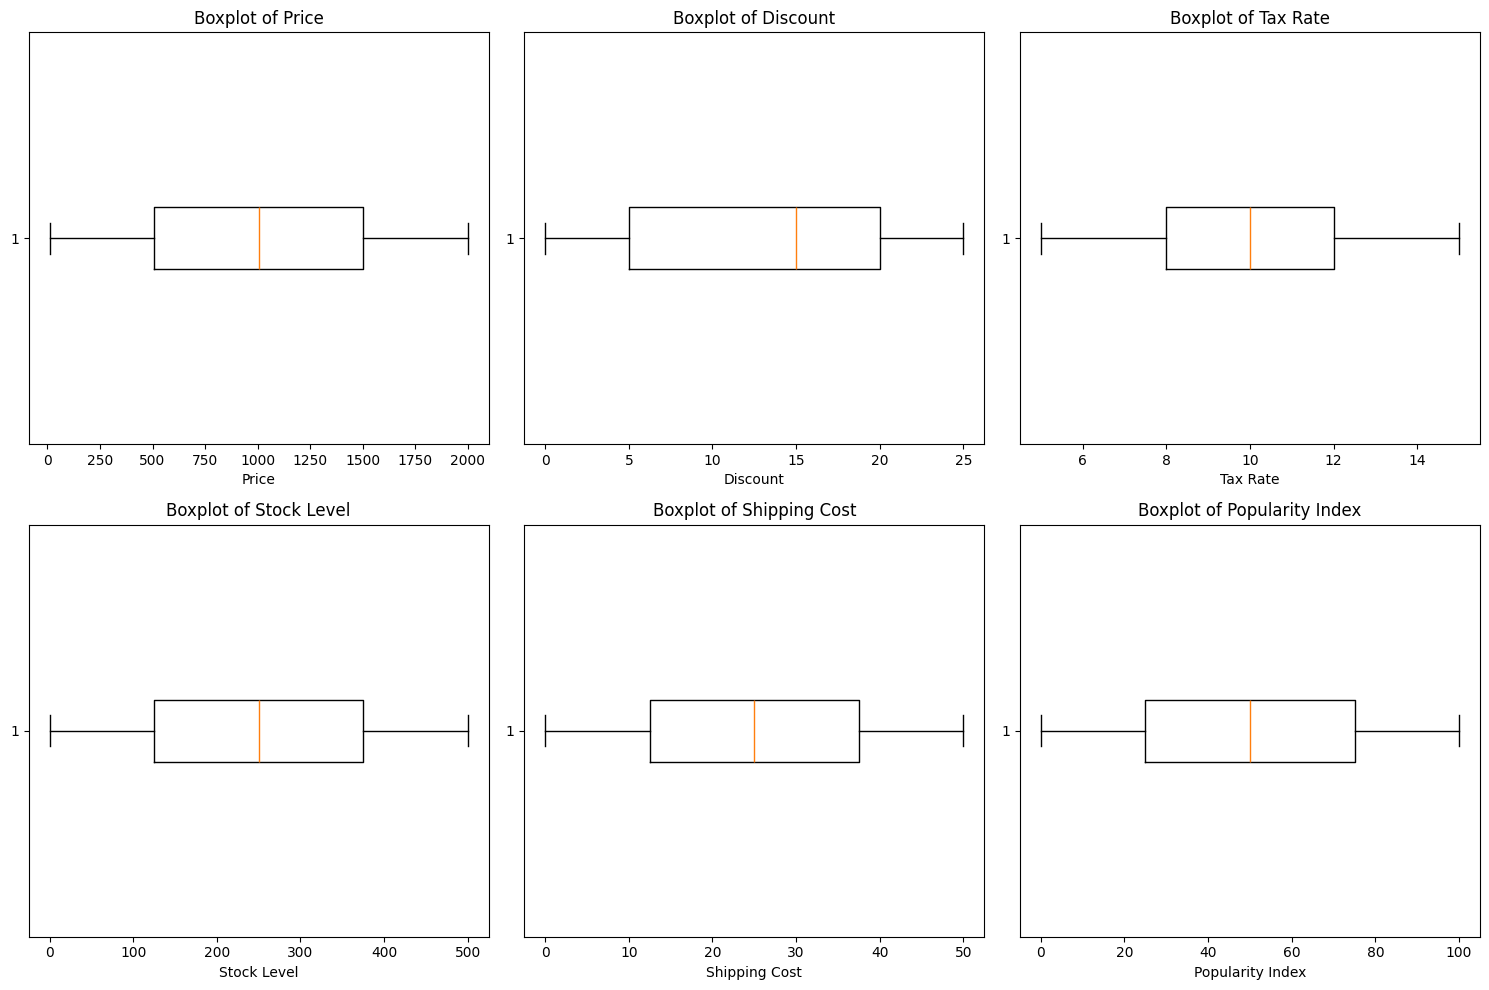

In [133]:

# 수치형 변수 선택
numerical_cols = ['Price', 'Discount', 'Tax Rate', 'Stock Level', 'Shipping Cost', 'Popularity Index']

# 박스플롯 생성
plt.figure(figsize=(15, 10))  # 그래프 크기 조정

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # 2행 3열 서브플롯
    plt.boxplot(data[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()  # 간격 조정
plt.show()



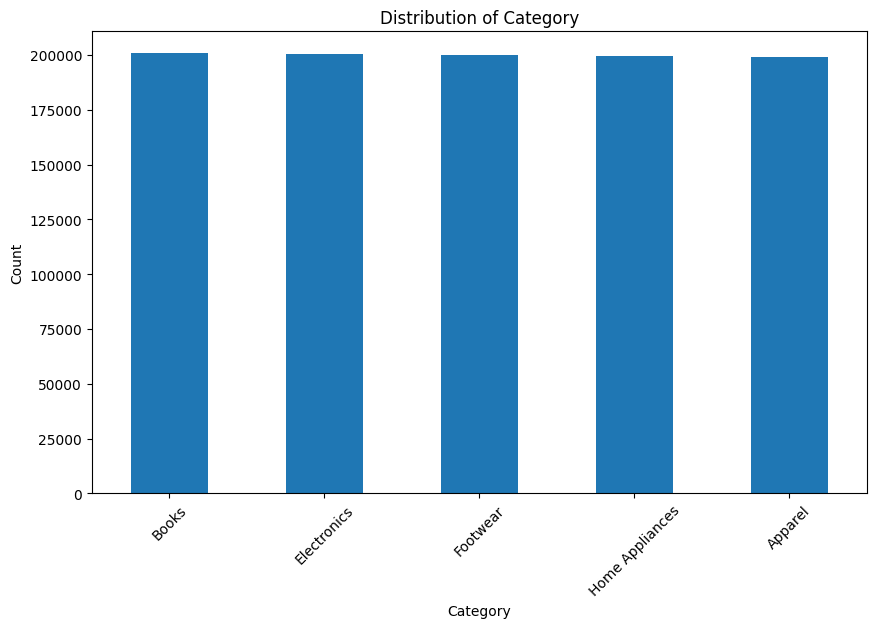

'Category' 값의 분포:
Category
Books              200751
Electronics        200231
Footwear           200089
Home Appliances    199708
Apparel            199221
Name: count, dtype: int64

--------------------------------------------------



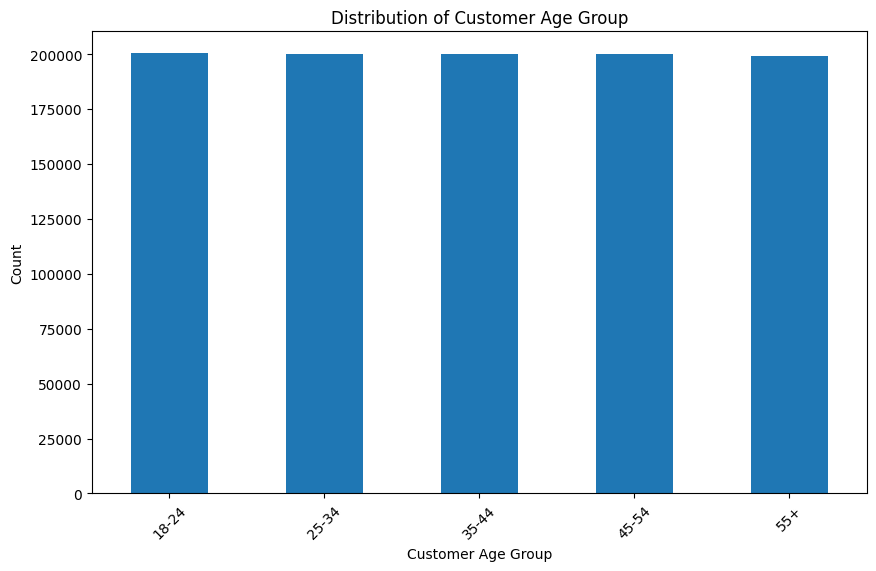

'Customer Age Group' 값의 분포:
Customer Age Group
18-24    200345
25-34    200313
35-44    200076
45-54    199937
55+      199329
Name: count, dtype: int64

--------------------------------------------------



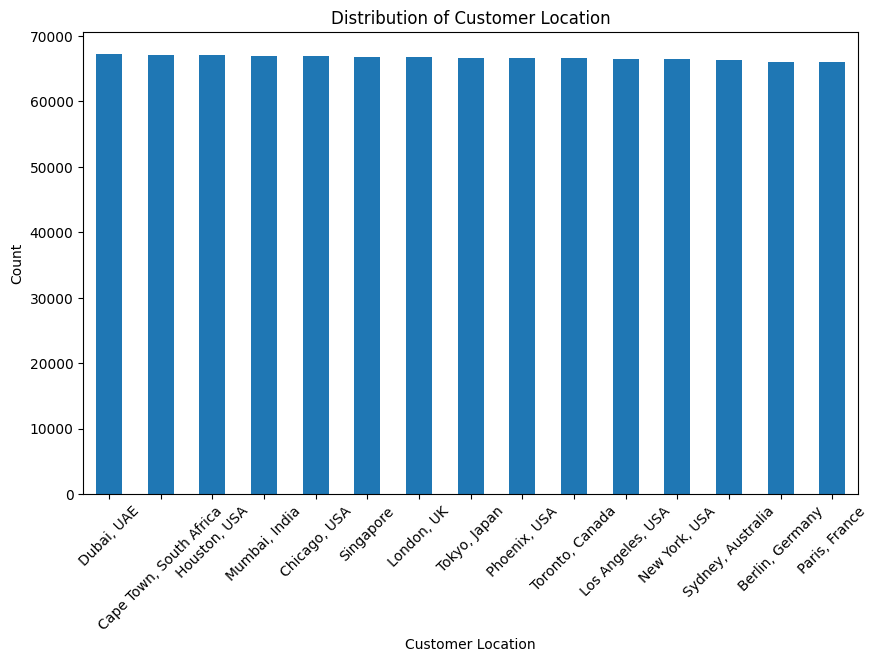

'Customer Location' 값의 분포:
Customer Location
Dubai, UAE                 67253
Cape Town, South Africa    67153
Houston, USA               67048
Mumbai, India              66912
Chicago, USA               66864
Singapore                  66802
London, UK                 66715
Tokyo, Japan               66618
Phoenix, USA               66604
Toronto, Canada            66559
Los Angeles, USA           66507
New York, USA              66463
Sydney, Australia          66334
Berlin, Germany            66086
Paris, France              66082
Name: count, dtype: int64

--------------------------------------------------



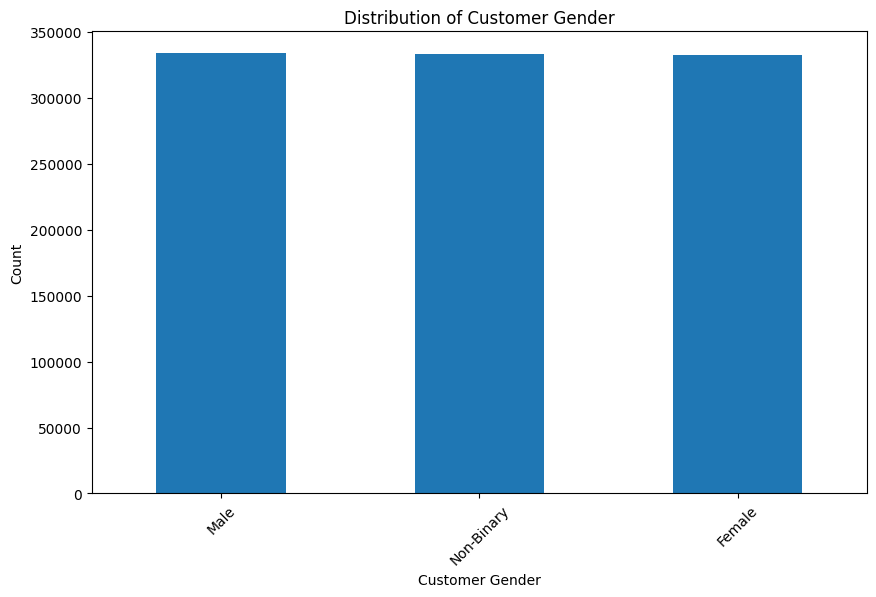

'Customer Gender' 값의 분포:
Customer Gender
Male          333791
Non-Binary    333541
Female        332668
Name: count, dtype: int64

--------------------------------------------------



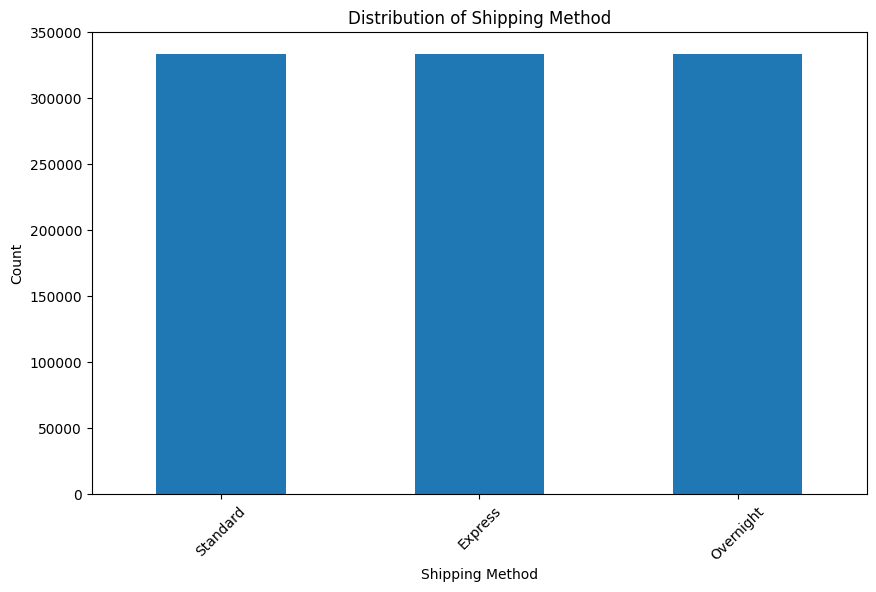

'Shipping Method' 값의 분포:
Shipping Method
Standard     333451
Express      333275
Overnight    333274
Name: count, dtype: int64

--------------------------------------------------



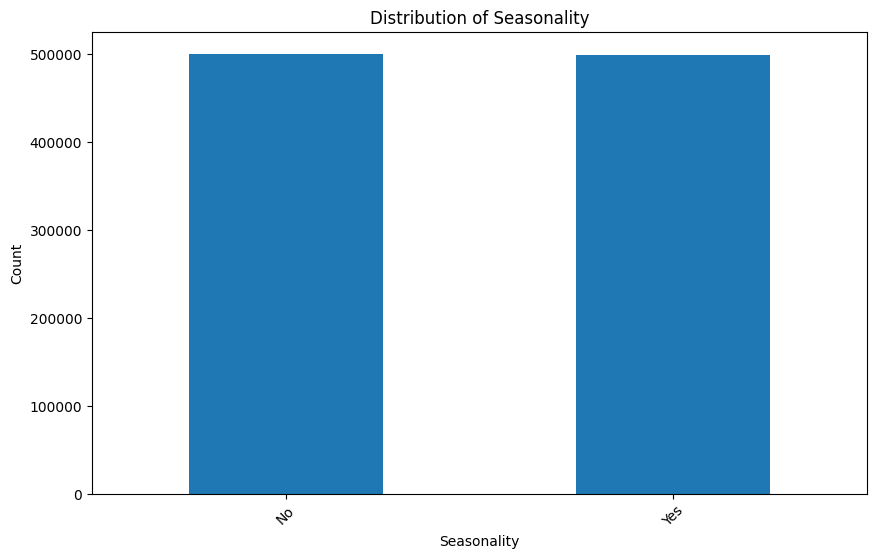

'Seasonality' 값의 분포:
Seasonality
No     500203
Yes    499797
Name: count, dtype: int64

--------------------------------------------------



In [134]:
import matplotlib.pyplot as plt

# 범주형 변수 선택
categorical_cols = ['Category', 'Customer Age Group', 'Customer Location', 
                    'Customer Gender', 'Shipping Method', 'Seasonality']

# 범주형 변수의 분포 확인
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
    
    # 값의 개수 출력
    print(f"'{col}' 값의 분포:")
    print(data[col].value_counts())
    print("\n" + "-"*50 + "\n")


>> 모든 칼럼의 데이터가 이상치없이 골고루 퍼져있음을 확인할 수 있다. 

#### 모델링 작업 전 데이터 전처리

1. 반품률 라벨인코딩 후 타겟 데이터로 지정  
2. y데이터와 x데이터를 정한 후, 학습용 데이터와 검증용 데이터 7 : 3으로 분할.
3. 분할된 데이터 행렬 확인

In [135]:
# 반품률을 수치형 데이터이기 때문에 분류 분석에 사용하기 위해 라벨인코딩 기법을 활용
# 반품률의 평균값을 기준으로 하여 반품과 미반품으로 구분한다.


mean_return_rate = data['Return Rate'].mean()
data_copy['Return Label'] = (data_copy['Return Rate'] > mean_return_rate).astype(int)
## 라벨인코딩을 통해 반품률이 평균을 초과하는 것은 1, 반품률이 평균 이하인 것은 0으로 변환
## 1은 반품될 가능성이 높음을 의미하고 0은 반품될 가능성이 낮음을 의미한다.

categorical_cols = ['Category', 'Customer Age Group', 'Customer Location', 'Customer Gender', 'Shipping Method', 'Seasonality']
encoded_data = pd.get_dummies(data_copy, columns=categorical_cols, drop_first = True)

excepting_cols = ['Product ID', 'Product Name', 'Supplier ID', 'Return Rate']
modeling_data = encoded_data.drop(columns=excepting_cols)

X = modeling_data.drop(columns=['Return Label'])
y = modeling_data['Return Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700000, 33), (300000, 33), (700000,), (300000,))

In [136]:
print("학습용 데이터 분포 :")
print(y_train.value_counts(normalize=True))

print("\n 검증용 데이터 분포 :")
print(y_test.value_counts(normalize=True))
## normalize=True로 하면 디폴트로 count하던 걸 비율로 계산할 수 있음


학습용 데이터 분포 :
Return Label
0    0.500863
1    0.499137
Name: proportion, dtype: float64

 검증용 데이터 분포 :
Return Label
1    0.500267
0    0.499733
Name: proportion, dtype: float64


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"정확도 : {accuracy:.4f}")
print("Classification Report: ")
print(report)


In [123]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

# 그리드 서치
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=1, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 예측
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
print("\n최적 모델 평가 결과:")
print(classification_report(y_test, y_pred_best))


Fitting 2 folds for each of 192 candidates, totalling 384 fits


KeyboardInterrupt: 

                                      Feature  Importance
0                                       Price    0.178132
4                               Shipping Cost    0.169313
3                                 Stock Level    0.150639
5                            Popularity Index    0.124582
1                                    Discount    0.054522
2                                    Tax Rate    0.049306
32                            Seasonality_Yes    0.019587
30                  Shipping Method_Overnight    0.016904
31                   Shipping Method_Standard    0.016632
29                 Customer Gender_Non-Binary    0.016539
28                       Customer Gender_Male    0.016027
12                   Customer Age Group_45-54    0.014182
11                   Customer Age Group_35-44    0.013399
13                     Customer Age Group_55+    0.013241
10                   Customer Age Group_25-34    0.013049
7                        Category_Electronics    0.012758
9             

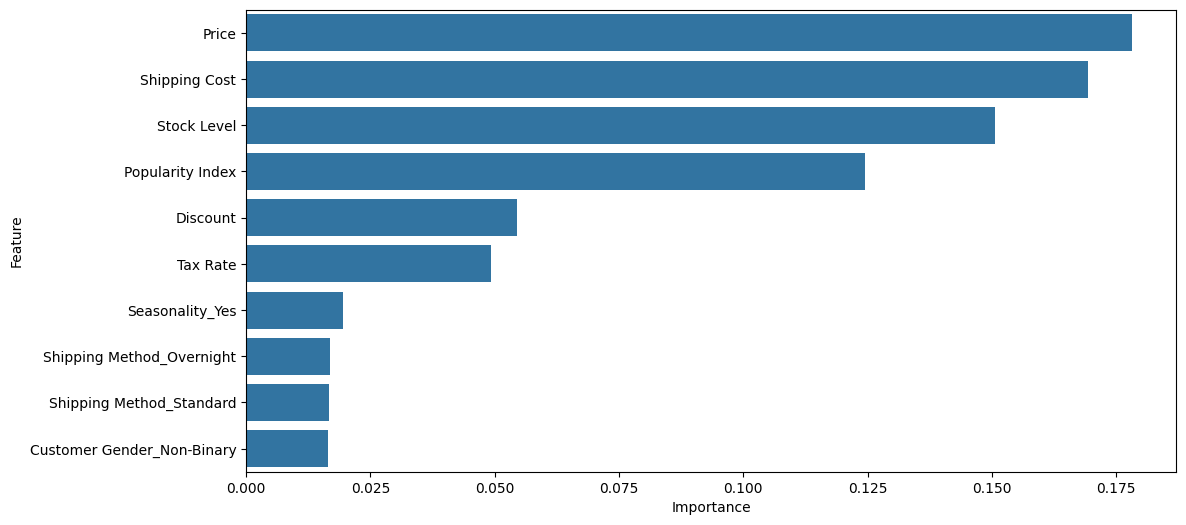

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance' : importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.show()